# Sinking the Titanic :  ‘women and children first’ ?

The code of conduct "women and children first", https://it.wikipedia.org/wiki/Women_and_Children_First, whereby the lives of women and children are to be saved first in a life-threatening situation, typically abandoning ship, when survival resources such as lifeboats were limited, it is associated with the sinking of Titanic. 

In the investigate Titanic Data Set, we seek to find confirmations on the fact that it is adopted "Women and children first". In particular, we want to answer the following question: is True that factors like sex and Age have been relevance in the survival of a passenger? Furthermore, we consider if the passsengers were alone or with family on Titanic. 

The Titanic Dataset was obtained on the Kaggle website and contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic, https://www.kaggle.com/c/titanic/data. We can find on the Kaggle website the following precise description of the "Titanic dataset":

  * Survived: survival,(0 = No; 1 = Yes);
  * Pclass: passenger class, (1 = 1st; 2 = 2nd; 3 = 3rd);
  * Name: name;
  * Sex: sex;
  * Age: age;
  * Sibsp: number of siblings/spouses aboard;
  * Parch: number of parents/children aboard;
  * Ticket: ticket number;
  * Fare: passenger fare;
  * Cabin: cabin;
  * Embarked: port of Embarkation, (C = Cherbourg; Q = Queenstown; S = Southampton);

There are the following special notes, the variable 'Pclass' is a proxy for socio-economic status (SES), 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower; the variable 'Age' is expressed in years, but if Age less than One (1) is Fractional and if the Age is estimated, it is in the form xx.5; With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The definitions used for the variable 'SibSp' and 'Parch' is the following:
    
   - Sibling: brother, sister, stepbrother, or stepsister of passenger aboard Titanic;
   * Spouse: husband or wife of passenger aboard Titanic (mistresses and fiances ignored);
   * Parent: mother or father of passenger aboard Titanic;
   * Child: son, daughter, stepson, or stepdaughter of passenger aboard Titanic;

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children       travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a     village, however,the definitions do not support such relations.

The variables that considered in the analysis are 'PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp' and 'Parch'.

## Exploring Dataset

In [8]:
# loading libraries for analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Loading Titanic dataset
df_titanic = pd.read_csv('titanic_data.csv')
# Dropping columns of df_titanic DataFrame not neccessary for analysis
df_titanic = df_titanic.drop(["Pclass", "Ticket","Fare","Cabin","Embarked"], axis=1)

### "Titanic" Dataset 

In [10]:
# Applying 'info' method to visualize concise summary of the df_titanic DataFrame
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 55.7+ KB


In [11]:
# Applying 'head' method to visualize first five row of the df_titanic DataFrame 
df_titanic.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch
0,1,0,"Braund, Mr. Owen Harris",male,22,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0
2,3,1,"Heikkinen, Miss. Laina",female,26,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0
4,5,0,"Allen, Mr. William Henry",male,35,0,0


In [12]:
# Applying 'describe' method for visualize various summary statistics of the variables 
df_titanic.describe()

,PassengerId,Survived,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594
std,257.353842,0.486592,14.526497,1.102743,0.806057
min,1.000000,0.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000
50%,446.000000,0.000000,28.000000,0.000000,0.000000
75%,668.500000,1.000000,38.000000,1.000000,0.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000


Looking the statistic of Titanic dataset above, the 'Age' variable has 714 observations, then we have 20% of missing values. In the investigation, it is necessary consider this fact and decide how to handle this values.  

In [13]:
# Creating 'grouped' function in which the data of the DataFrame are split into groups to aggregate the passengers, 'PassengerId', 
# based on one o more variables that interest, once this a done, to do counting for each group, using 'count' method 
def grouped (DataFrame,variables_groupby,variables_count):
    df = DataFrame.groupby(variables_groupby,as_index=False)
    dataframe = df.agg({variables_count:'count'})
    return dataframe.rename(columns = {variables_count:'Number_of_Passenger'}) 

### Titanic Dataset :  'Sex'  

In the investigation we seek confirm on the fact "Women and Children First", the first thing to understand if the factor of gender of passenger is important for survival. We start to respond to the following questions, how many of were the 891 of the 2224 passengers and crew on board the Titanic male o female? How many of were the passengers and crew on board the Titanic  saved? How many of were male saved? and how many were female saved? 

In [26]:
# Applying 'grouped' function that create DataFrame that aggregate the passengers on the based Sex and Survived and count passengers 
DataFrame_sex_survived = grouped(df_titanic,['Sex','Survived'],'PassengerId')
DataFrame_sex_survived

,Sex,Survived,Number_of_Passenger
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


In [27]:
# Calculating the number of male and female 
total_male = DataFrame_sex_survived.Number_of_Passenger[2:4].sum()
total_female = DataFrame_sex_survived.Number_of_Passenger[0:2].sum() 

print 'Number of male passengers:', total_male
print 'Number of female passengers:', total_female

Number of male passengers: 577
Number of female passengers: 314


In [22]:
# Calculating the number of survivors and dead 
total_survived = DataFrame_sex_survived.Number_of_Passenger[1] + DataFrame_sex_survived.Number_of_Passenger[3] 
total_died = DataFrame_sex_survived.Number_of_Passenger[0] + DataFrame_sex_survived.Number_of_Passenger[2] 

print 'Number of died passengers:', total_died 
print 'Number of survived passengers:', total_survived

Number of died passengers: 549
Number of survived passengers: 342


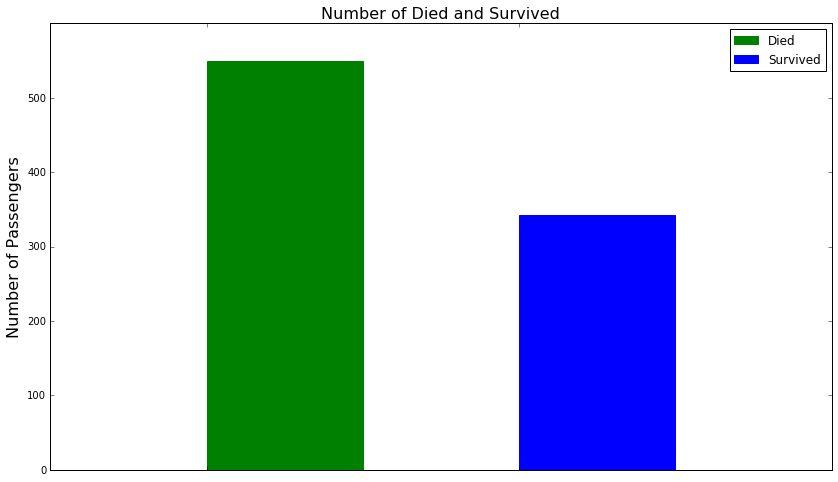

In [23]:
# Creating barplot that represented number of survivors and dead 
# Defining plot size in inches (width, height) 
fig = plt.figure(figsize=(14, 8))

# Defining the x locations for the groups
index = np.arange(0,2) 

# Ploting data
died_survived_bar = plt.bar(index, [total_died,total_survived], width=0.5)

# Defining color bar
died_survived_bar[0].set_color('g')
died_survived_bar[1].set_color('b'),

# Configuring legend
plt.legend( (died_survived_bar[0],died_survived_bar [1]), ('Died','Survived') )

# Configuring X axes
plt.xlim(-0.5,2)
plt.xticks(index, ('',''))

# Configuring  Y axes
plt.ylim(0,600)
plt.yticks(np.arange(0,600,100))

# Labels
plt.xlabel("")
plt.ylabel("Number of Passengers", size=16)

# Title
plt.title("Number of Died and Survived", size=16)

# Showing plot
plt.show()

In [28]:
# Calculating the number of survivors and dead passengers by gender
total_survived_male = DataFrame_sex_survived['Number_of_Passenger'][3]
total_died_male = DataFrame_sex_survived['Number_of_Passenger'][2]
total_survived_female = DataFrame_sex_survived['Number_of_Passenger'][1]
total_died_female = DataFrame_sex_survived['Number_of_Passenger'][0]

print 'Number of male survived passengers:', total_survived_male
print 'Number of male died passengers:', total_died_male 
print 'Number of female survived passengers:', total_survived_female
print 'Number of female died passengers:', total_died_female 

Number of male survived passengers: 109
Number of male died passengers: 468
Number of female survived passengers: 233
Number of female died passengers: 81


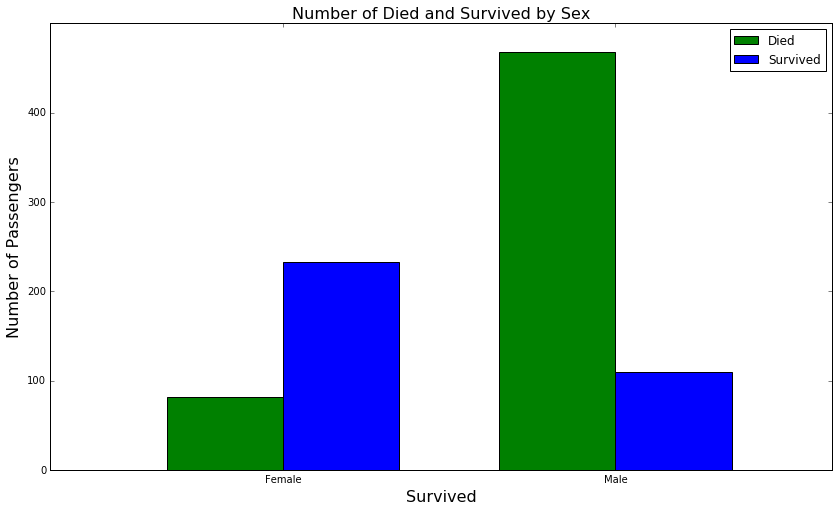

In [30]:
# Creating barplot that represented number of survivors and dead by Sex 
# Defining plot size in inches (width, height)
fig = plt.figure(figsize=(14, 8))

# Defining the x locations for the groups
index = np.arange(0,2,1)

# Ploting data
died_bar = plt.bar(index, [total_died_female,total_died_male], width=0.35,color='g')
survived_bar = plt.bar(index + 0.35, [total_survived_female,total_survived_male], width=0.35,color='b')

# Configuring legend
plt.legend( (died_bar,survived_bar), ('Died','Survived') )

# Configuring X axes
plt.xlim(-0.35,2)
plt.xticks(index + 0.35, ('Female','Male'))

# Configuring Y axes
plt.ylim(0,500)
plt.yticks(np.arange(0,500,100))

# Labels
plt.xlabel("Survived", size=16)
plt.ylabel("Number of Passengers", size=16)

# Title
plt.title("Number of Died and Survived by Sex", size=16)

# Showing plot
plt.show()

The results give us the first confirm of the fact that is adopted the code "Women and child first", in fact the majority of the dead were male.

### Titanic Dataset : "Age" 

In order to find confirm on the code of conduct "Women and Child First", we consider the 'Age' variable . As already noted, the variable 'Age' has NaN values. We decide to use 'dropna' method to remove this values.

In [31]:
# Removing the NaN values of 'Age' variable 
Age_dropna = df_titanic.Age.dropna()

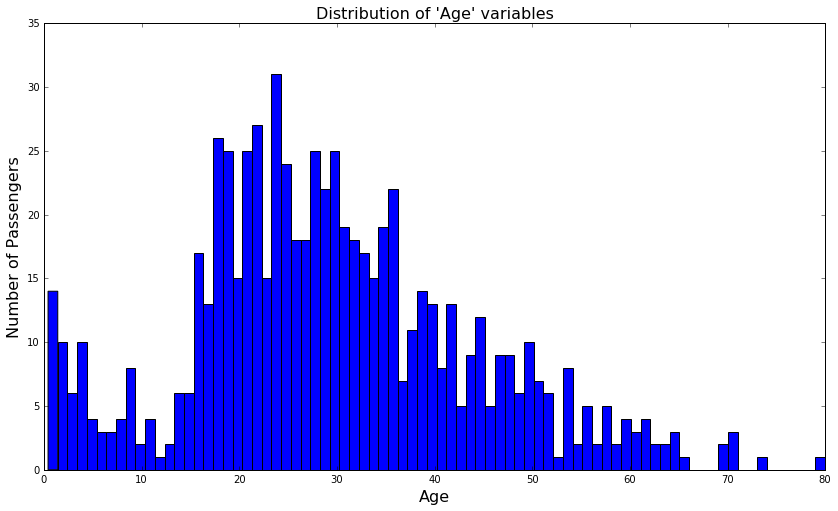

In [33]:
# Creating histogram that representation of the distribution of 'Age' variable 
# Defining plot size in inches (width, height) 
fig = plt.figure(figsize=(14, 8))

# Ploting data
plt.hist(Age_dropna,bins=80)

# Labels
plt.xlabel("Age",size=16)
plt.ylabel("Number of Passengers",size=16)

# Title
plt.title("Distribution of 'Age' variables",size=16)

# Showing plot
plt.show()

From the histogram above, we see that the most of passengers on the titanic were between the ages of 17 and 40.   

In [34]:
# Creating series " age of male passengers" and " age of female passengers"
male_age = df_titanic["Age"][df_titanic.Sex == 'male'].dropna()
female_age = df_titanic ["Age"][df_titanic.Sex == 'female'].dropna()

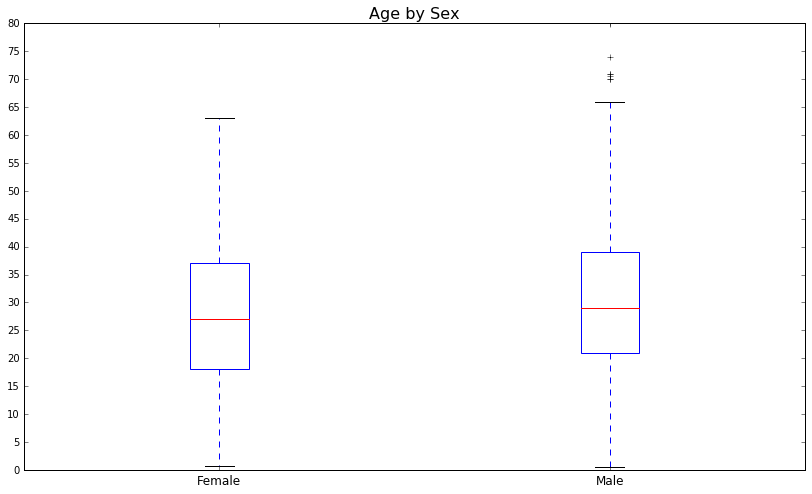

In [41]:
# Creating boxplot to analyze differences between ages among male passengers and female passengers.
# Defining plot size in inches (width, height)
fig = plt.figure(figsize=(14, 8))

# Ploting data
female_male_age_bp = plt.boxplot([female_age,male_age],patch_artist=True)

# Configuring X axes
plt.xticks([1,2],['Female', 'Male'], fontsize=12)

# Configuring Y axes
plt.yticks(np.arange(0,85,5))

# Title
plt.title("Age by Sex", size=16)

# Showing plot
plt.show()

In [36]:
# Creating series " age of the survived passengers" and " age of the died passengers"
survived_age = df_titanic["Age"][df_titanic.Survived == 1 ].dropna()
died_age = df_titanic ["Age"][df_titanic.Survived == 0 ].dropna()

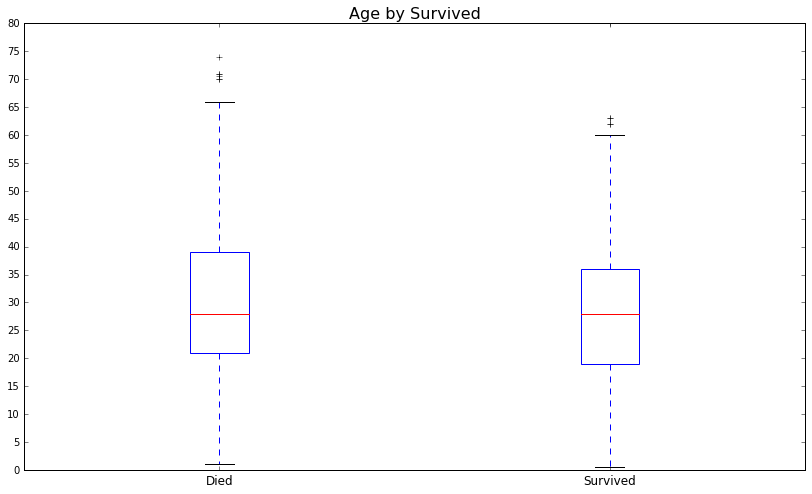

In [40]:
# Creating boxplot to analyze differences between ages among survived passengers and died passengers.
# Define plot size in inches (width, height)
fig = plt.figure(figsize=(14, 8))

# Ploting data
survived_bp = plt.boxplot([died_age,survived_age],patch_artist=True)

# Configuring X axes
plt.xticks([1,2],['Died', 'Survived'], fontsize=12)

# Configuring Y axes
plt.yticks(np.arange(0,85,5))

# Title
plt.title("Age by Survived", size=16)

# Showing plot
plt.show()

In [38]:
# Creating series "age of the survived male passengers", " age of the died male passengers", " age of the survived female 
# passengers" and " age of the died female passengers"
survived_male_age = df_titanic["Age"][(df_titanic.Survived == 1) & (df_titanic.Sex == 'male')].dropna()
died_male_age = df_titanic ["Age"][(df_titanic.Survived == 0) & (df_titanic.Sex == 'male')].dropna()
survived_female_age = df_titanic["Age"][(df_titanic.Survived == 1) & (df_titanic.Sex == 'female')].dropna()
died_female_age = df_titanic ["Age"][(df_titanic.Survived == 0) & (df_titanic.Sex == 'female')].dropna()

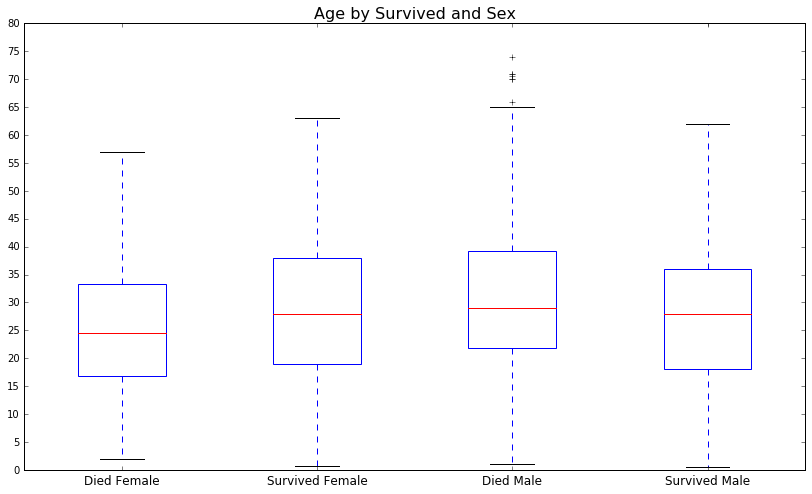

In [39]:
# Creating boxplot to analyze differences between ages among male passengers, survived and died, female passengers, survived and
# died
# Defining plot size in inches (width, height)
fig = plt.figure(figsize=(14, 8))

# Ploting data
survived_bp = plt.boxplot([died_female_age ,survived_female_age, died_male_age,survived_male_age],patch_artist=True)

# Configuring X axes
plt.xticks([1,2,3,4],['Died Female','Survived Female', 'Died Male', 'Survived Male'], fontsize=12)

# Configuring Y axes
plt.yticks(np.arange(0,85,5))

# Title
plt.title("Age by Survived and Sex", size=16)

# Showing plot
plt.show()

We observe the three box plot reported above there are small difference between the distributions which are compare. But we can derive of the information. We see clearly from box plot that compare the age of who is female and who is male that the passengers older are male. From box plot that compare the age of who died and who is survived, the passengers older are died. When we compare died female, survived female, died male,survived male, we see that the died females are the younger, the died males died are older. It is necessary further investigation if the "Women and children first" is respected also for child and not only for women.

### Titanic Dataset : 'SibSp' and 'Parch'  

We procede to consider the 'SibSp' variable and 'Parch', the information that derive from this variables is if the passengers were alone or with family on titanic. This variables are closely connected with the fact if is adopted "Women and children", given that it is likely the children didn't travel alone.   

In [42]:
# Creating 'alone' function  that returns 'yes' if the numeric value is equal than 0 or 'no' if the numeric value is not equal 
# than 0    
def alone(data):
    if data == 0 :
        return'yes'
    else:
        return 'no'

In [43]:
# Creating new variable 'SibSp_Plus_Parch', adding column to the df_titanic DataFrame, which is giving from sum of the values of 
# 'SibSp' variable and 'Parch' variable.
df_titanic['SibSp_Plus_Parch'] = df_titanic.SibSp + df_titanic.Parch
# Applying head module for visualize first five row of the df_titanic DataFrame with new column'SibSp_Plus_Parch' 
df_titanic.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,SibSp_Plus_Parch
0,1,0,"Braund, Mr. Owen Harris",male,22,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,1
2,3,1,"Heikkinen, Miss. Laina",female,26,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,1
4,5,0,"Allen, Mr. William Henry",male,35,0,0,0


In [44]:
# Applying function 'alone' to the 'SibSp_Plus_Parch' column that create new column 'SibSp_Plus_Parch_Alone'
df_titanic['SibSp_Plus_Parch_Alone'] = df_titanic.SibSp_Plus_Parch.apply(alone)
# Applying head module for visualize first five row of the df_titanic DataFrame with new column 'SibSp_Plus_Parch_Alone'
df_titanic.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,SibSp_Plus_Parch,SibSp_Plus_Parch_Alone
0,1,0,"Braund, Mr. Owen Harris",male,22,1,0,1,no
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,1,no
2,3,1,"Heikkinen, Miss. Laina",female,26,0,0,0,yes
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,1,no
4,5,0,"Allen, Mr. William Henry",male,35,0,0,0,yes


In [45]:
# Applying function 'grouped' that create DataFrame that aggregate the passengers on the based 'SibSp_Plus_Parch_Alone' variable, 
# 'Survived' variable and 'Sex' variable, and count passengers.
DataFrame_SibSp_Plus_Parch_Survived_Sex = grouped(df_titanic,['SibSp_Plus_Parch_Alone','Survived','Sex'],'PassengerId')
DataFrame_SibSp_Plus_Parch_Survived_Sex

,SibSp_Plus_Parch_Alone,Survived,Sex,Number_of_Passenger
0,no,0,female,54
1,no,0,male,121
2,no,1,female,134
3,no,1,male,45
4,yes,0,female,27
5,yes,0,male,347
6,yes,1,female,99
7,yes,1,male,64


In [46]:
# Calculating the number of survivors,alone and no alone,and dead,alone and no alone 
total_survived_alone = DataFrame_SibSp_Plus_Parch_Survived_Sex.Number_of_Passenger[6:8].sum()
total_died_alone = DataFrame_SibSp_Plus_Parch_Survived_Sex.Number_of_Passenger[4:6].sum()
total_survived_no_alone = DataFrame_SibSp_Plus_Parch_Survived_Sex.Number_of_Passenger[2:4].sum()
total_died_no_alone = DataFrame_SibSp_Plus_Parch_Survived_Sex.Number_of_Passenger[0:2].sum()

print 'Number of survived alone :', total_survived_alone
print 'Number of died alone:', total_died_alone
print 'Number of survived no alone:', total_survived_no_alone 
print 'Number of died no alone:', total_died_no_alone

Number of survived alone : 163
Number of died alone: 374
Number of survived no alone: 179
Number of died no alone: 175


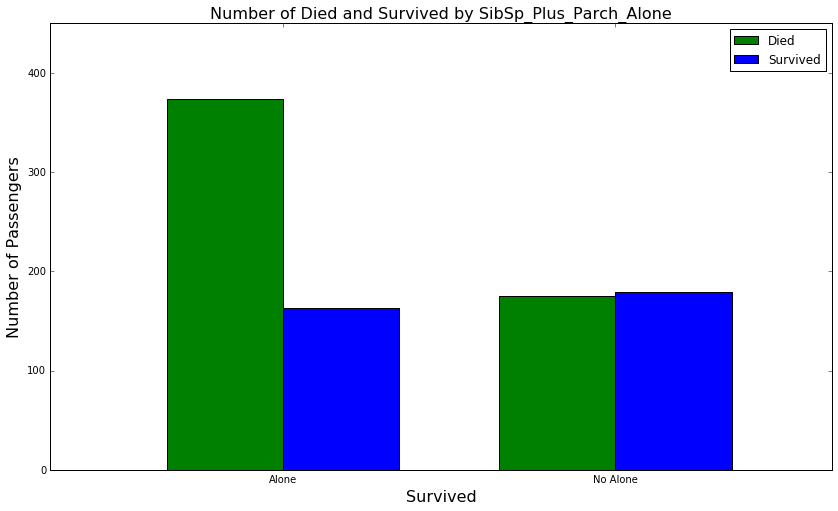

In [48]:
# Creating barplot that represented number of survivors and dead by 'SibSp_Plus_Parch_Alone' variable
# Defining plot size in inches (width, height)
fig = plt.figure(figsize=(14, 8))

# Defining the x locations for the groups
index = np.arange(0,2,1)

# Ploting data
died_bar = plt.bar(index, [total_died_alone,total_died_no_alone], width = 0.35,color='g')
survived_bar = plt.bar(index + 0.35, [total_survived_alone, total_survived_no_alone ], width = 0.35,color='b')

# Configuring legend
plt.legend( (died_bar,survived_bar), ('Died','Survived') )

# Configuring X axes
plt.xlim(-0.35,2)
plt.xticks(index + 0.35, ('Alone','No Alone'))

# Configuring  Y axes
plt.ylim(0,450)
plt.yticks(np.arange(0,450,100))

# Labels
plt.xlabel("Survived", size=16)
plt.ylabel("Number of Passengers", size=16)

# Title
plt.title("Number of Died and Survived by SibSp_Plus_Parch_Alone" , size=16)

# Showing plot
plt.show()

In [51]:
# Calculating the number of female,alone and no alone,and male,alone and no alone 
total_female_alone = DataFrame_SibSp_Plus_Parch_Survived_Sex.Number_of_Passenger[4] + DataFrame_SibSp_Plus_Parch_Survived_Sex.Number_of_Passenger[6]
total_male_alone = DataFrame_SibSp_Plus_Parch_Survived_Sex.Number_of_Passenger[5] + DataFrame_SibSp_Plus_Parch_Survived_Sex.Number_of_Passenger[7]
total_female_no_alone = DataFrame_SibSp_Plus_Parch_Survived_Sex.Number_of_Passenger[0] + DataFrame_SibSp_Plus_Parch_Survived_Sex.Number_of_Passenger[2]
total_male_no_alone = DataFrame_SibSp_Plus_Parch_Survived_Sex.Number_of_Passenger[1] + DataFrame_SibSp_Plus_Parch_Survived_Sex.Number_of_Passenger[3] 
                    
print 'Number of female alone:', total_female_alone 
print 'Number of male alone :', total_male_alone
print 'Number of female no alone :', total_female_no_alone 
print 'Number of male no alone:', total_male_no_alone 

Number of female alone: 126
Number of male alone : 411
Number of female no alone : 188
Number of male no alone: 166


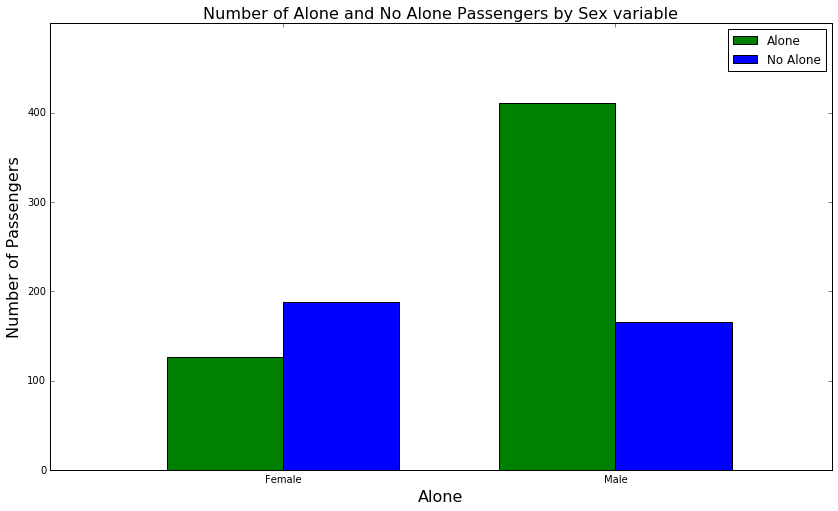

In [52]:
# Creating barplot that represented number of female and male by 'SibSp_Plus_Parch_Alone' variable
# Defining plot size in inches (width, height)
fig = plt.figure(figsize=(14, 8))

# Defining the x locations for the groups
index = np.arange(0,2,1)

# Plotting data
alone_bar = plt.bar(index, [total_female_alone,total_male_alone], width = 0.35,color='g')
no_alone_bar = plt.bar(index + 0.35, [total_female_no_alone, total_male_no_alone ], width = 0.35,color='b')

# Configuring legend
plt.legend( (alone_bar,no_alone_bar), ('Alone','No Alone') )

# Configuring X axes
plt.xlim(-0.35,2)
plt.xticks(index + 0.35, ('Female','Male'))

# Configuring Y axes
plt.ylim(0,500)
plt.yticks(np.arange(0,500,100))

# Labels
plt.xlabel("Alone", size=16)
plt.ylabel("Number of Passengers", size=16)

# Title
plt.title("Number of Alone and No Alone Passengers by Sex variable" , size=16)

# Show plot
plt.show()

From figures above, we see that the majority of the dead were alone. This is tightly connected of the fact that the majority  passengers alone on titanic were male.   

### Titanic Dataset : Children 

To determine how many passengers were considered children, we analysis the age of the passengers alone and those with family. 

In [53]:
# Creating new variable 'AgeRound', adding column to the df_titanic DataFrame, which is given by application 'round' module to 
# 'Age' column
df_titanic['AgeRound'] = df_titanic["Age"].round()
# Applying head module for visualize first five row of the df_titanic DataFrame with new column 'AgeRound'
df_titanic.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,SibSp_Plus_Parch,SibSp_Plus_Parch_Alone,AgeRound
0,1,0,"Braund, Mr. Owen Harris",male,22,1,0,1,no,22
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,1,no,38
2,3,1,"Heikkinen, Miss. Laina",female,26,0,0,0,yes,26
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,1,no,35
4,5,0,"Allen, Mr. William Henry",male,35,0,0,0,yes,35


In [54]:
# Creating DataFrame that contains data on alone passengers.
DataFrame_No_Alone =  df_titanic[(df_titanic.SibSp_Plus_Parch_Alone == 'no') ]
# Applying head module for visualize first five row of the df_titanic DataFrame with new column 'AgeRound'
DataFrame_No_Alone.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,SibSp_Plus_Parch,SibSp_Plus_Parch_Alone,AgeRound
0,1,0,"Braund, Mr. Owen Harris",male,22,1,0,1,no,22
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,1,no,38
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,1,no,35
7,8,0,"Palsson, Master. Gosta Leonard",male,2,3,1,4,no,2
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,2,no,27


In [55]:
# Creating DataFrame that contains data on passengers with family
DataFrame_Yes_Alone = df_titanic[(df_titanic.SibSp_Plus_Parch_Alone == 'yes') ]
# Applying head module for visualize first five row of the df_titanic DataFrame with new column 'AgeRound'
DataFrame_No_Alone.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,SibSp_Plus_Parch,SibSp_Plus_Parch_Alone,AgeRound
0,1,0,"Braund, Mr. Owen Harris",male,22,1,0,1,no,22
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,1,no,38
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,1,no,35
7,8,0,"Palsson, Master. Gosta Leonard",male,2,3,1,4,no,2
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,2,no,27


In [56]:
# Apply 'grouped' function  to the 'DataFrame_Yes_Alone' that create DataFrame that aggregate passengers on the based 
# 'AgeRound' variable and count passengers
DataFrame_Age_No_Alone = grouped(DataFrame_No_Alone ,'AgeRound','SibSp_Plus_Parch_Alone')

In [57]:
# Apply 'grouped' function to the 'DataFrame_Yes_Alone' DataFrame that create DataFrame that aggregate passengers on the based 
# 'AgeRound' variable and count passengers
DataFrame_Age_Yes_Alone = grouped(DataFrame_Yes_Alone ,'AgeRound','SibSp_Plus_Parch_Alone')

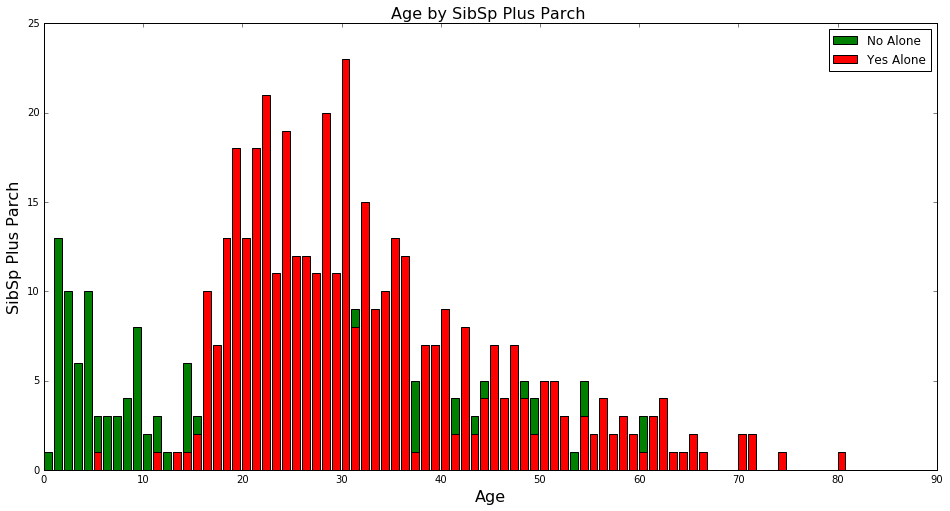

In [58]:
# Creating barplot that represents 'SibSp_Plus_Parch_Alone'variable for "DataFrame_Age_No_Alone" DataFrame and for 
# "DataFrame_Age_Yes_Alone" DataFrame by Age, overlapping   
# Define plot size in inches (width, height)  
fig = plt.figure(figsize=(16, 8))

#plot data
no_alone = plt.bar(DataFrame_Age_No_Alone.AgeRound, DataFrame_Age_No_Alone.Number_of_Passenger,color='g')
yes_alone = plt.bar(DataFrame_Age_Yes_Alone.AgeRound,DataFrame_Age_Yes_Alone.Number_of_Passenger,color='r') 

#labels
plt.xlabel("Age",size=16)
plt.ylabel("SibSp Plus Parch",size=16)

#title
plt.title("Age by SibSp Plus Parch ",size=16)

#configure legend
plt.legend( (no_alone,yes_alone), ('No Alone','Yes Alone') )

#show plot
plt.show()

In the plot above, we observe that the majority of the passengers no alone were on the titanic were between the ages of 0 and 15 years. Given that it is likely the children didn't travel alone, we consider "children", the passengers are in the 0-15 age group. In this age group are few the passengers alone.   

In [59]:
# Creating DataFrame that contains data of alone passengers between the ages of 5 and 15  
passengers_5_years = df_titanic[((df_titanic.AgeRound >= 5) & (df_titanic.AgeRound <= 15)) \
                     & (df_titanic.SibSp_Plus_Parch_Alone == 'yes')]
# Visualize Dataframe 
passengers_5_years

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,SibSp_Plus_Parch,SibSp_Plus_Parch_Alone,AgeRound
14,15,0,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,0,yes,14
22,23,1,"McGowan, Miss. Anna ""Annie""",female,15,0,0,0,yes,15
731,732,0,"Hassan, Mr. Houssein G N",male,11,0,0,0,yes,11
777,778,1,"Emanuel, Miss. Virginia Ethel",female,5,0,0,0,yes,5
780,781,1,"Ayoub, Miss. Banoura",female,13,0,0,0,yes,13
875,876,1,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,0,yes,15


Reading biography, https://www.encyclopedia-titanica.org/, reported following, of the passengers in the 0-15 age group alone, this were on the titanic together with someone that not included in the definitions used for the variable 'SibSp' and 'Parch'. This strengthens the definition of children based on 0-15 age group.      

* Vestrom, Miss. Hulda Amanda Adolfina
Hulda boarded the Titanic at Southampton, having travelled via Copenhagen, as a third class passenger (ticket number 350406  which cost £7, 17s, 1d ). She was travelling with her maternal aunt, Hulda Christina Eugenia Klasén, née Löfqvist, to her home in Los Angeles, California and was also accompanied by Mrs Klasén's brother-in-law Klas Albin Klasén and his niece Gertrude Emilia Klasén. Other in the party included: Mrs Sandström and her two daughters, and Elina Olsson and Thure Lundström.

* McGowan, Miss. Anna "Annie" 
In late 1911 Annie's aunt Catherine McGowan, her father's younger unmarried sister, had returned home to Ireland from Chicago, Illinois with the intent on chaperoning her niece across the Atlantic and they were part of a group of over a dozen steerage passengers from their locale making the same journey aboard Titanic. Annie and her boarded Titanic at Queenstown on 11 April 1912 (ticket number330923 which cost £7, 15s, 7d) and her destination was to the home of another aunt, Mrs Thomas McDermott of 3241 North Ashland Avenue, Chicago.

* Hassan, Mr. Houssein G N
Mr Husayn Mahmūd Husayn Ibrāhīm, 11, from Lebanon was travelling with Nassef Cassem Albimona to visit his parents in America.
Mr Farīd Husayn Qāsim Al-Munà was born in Shānā, Lebanon around 1893.
Aged 18 in 1912, Farīd worked as a farmhand in his native Shānā. A relative (presumably a cousin), Nāsīf Qāsim Abī-Al-Munà, had been living in the USA since 1903 and had established himself as a successful merchant. He had returned to Shānā around late 1910 where he married before making plans to return to America; Farīd would be joining him on his return across the Atlantic.
Farīd boarded the Titanic at Cherbourg on 10 April 1912 (ticket number 2700 which cost £7, 4s, 7d) as a third class passenger. Travelling with him, besides Nāsīf Qāsim Abī-Al-Munà, was another young relative, 11-year-old Husayn Mahmūd Husayn Ibrāhīm, and his destination was to be Fredericksburg, Virginia, where Nāsīf made his home.

* Emanuel, Miss. Virginia Ethel 
Miss Virginia Ethel Emmanuel, 5, boarded the Titanic at Southampton with her Nurse Miss Elizabeth Dowdell who was escorting her to her grandparents home in New York, NY. Her step-father had deserted her and her mother who was, according the New York American, the Opera singer Estelle Emanuele

* Ayoub, Miss. Banoura 
Miss Banoura Ayoub 1, aged 14 2 from Kafr 'Abaida, Lebanon was travelling to Columbus, USA to join her uncle in Owen Sound, Ontario, Canada. She did not know or understand English and left her parents behind in Lebanon.
She boarded the Titanic at Cherbourg as a third class passenger (ticket number 2687, £7 4s 7d) with the cousins Shawneene George Whabee, Tannous Thomas, Gerios Yousseff and Tannous Doharr. The rest of the group were bound for Youngstown. Ohio.

* Najib, Miss. Adele Kiamie "Jane"
Miss Adele Jane Kiamie Najib, 15, was born in Syria (Lebanon) on 14 November 1896, the daughter of Najeeb Kiamie and Merion Nasias. She boarded the Titanic at Cherbourg as a third class passenger together with Latifa Baclini and Mrs Baclini's daughters (ticket number 2667, £7 4s 6d). She was travelling to America to be married. The women and the three girls were rescued in collapsible C.

In [66]:
# Creating function 'child' that returns 'yes' if the numeric value is x is less than or equal to 15 or 'no' if the numeric value 
# is greater than 15  
def child(age):
    if  age <= 15:
        return 'yes'
    else:
        return 'no'

In [67]:
# Creating new variable 'children', adding column to the df_titanic DataFrame, which is given by application 'child' function 
# 'Age' column
df_titanic['children'] = df_titanic.Age.apply(child)    
df_titanic.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,SibSp_Plus_Parch,SibSp_Plus_Parch_Alone,AgeRound,children
0,1,0,"Braund, Mr. Owen Harris",male,22,1,0,1,no,22,no
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,1,no,38,no
2,3,1,"Heikkinen, Miss. Laina",female,26,0,0,0,yes,26,no
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,1,no,35,no
4,5,0,"Allen, Mr. William Henry",male,35,0,0,0,yes,35,no


In [68]:
# Apply function 'grouped' to the 'df_titanic' DataFrame that create DataFrame that aggregate passengers on the based 'children'
# variable, Survived and Sex, and count passengers 
DataFrame_children_Sex_Survived = grouped(df_titanic,['children','Survived','Sex'],'PassengerId')
DataFrame_children_Sex_Survived 

,children,Survived,Sex,Number_of_Passenger
0,no,0,female,66
1,no,0,male,449
2,no,1,female,205
3,no,1,male,88
4,yes,0,female,15
5,yes,0,male,19
6,yes,1,female,28
7,yes,1,male,21


In [72]:
# Calculating the number of children and adult passengers
total_children = DataFrame_children_Sex_Survived.Number_of_Passenger[4:8].sum() 
total_adult = DataFrame_children_Sex_Survived.Number_of_Passenger[0:4].sum() 

print'Number of children:', total_children
print'Number of adult:', total_adult

Number of children: 83
Number of adult: 808


In [70]:
# Calculating the number of boys, girls, men and women
total_boys = DataFrame_children_Sex_Survived.Number_of_Passenger[5] + DataFrame_children_Sex_Survived.Number_of_Passenger[7]
total_girls = DataFrame_children_Sex_Survived.Number_of_Passenger[4] + DataFrame_children_Sex_Survived.Number_of_Passenger[6]
total_men = DataFrame_children_Sex_Survived.Number_of_Passenger[1] + DataFrame_children_Sex_Survived.Number_of_Passenger[3]
total_women = DataFrame_children_Sex_Survived.Number_of_Passenger[0] + DataFrame_children_Sex_Survived.Number_of_Passenger[2] 

print'Number of boys:', total_boys
print'Number of girls:', total_girls
print'Number of men:', total_men
print'Number of women:', total_women

Number of boys: 40
Number of girls: 43
Number of men: 537
Number of women: 271


In [74]:
# Calculating the number of survivors child, dead child,survivors adult and dead adult
total_survived_children = DataFrame_children_Sex_Survived.Number_of_Passenger[6:8] .sum()
total_died_children = DataFrame_children_Sex_Survived.Number_of_Passenger[4:6].sum() 
total_survived_adult = DataFrame_children_Sex_Survived.Number_of_Passenger[2:4].sum()
total_died_adult = DataFrame_children_Sex_Survived.Number_of_Passenger[0:2].sum() 
 
print 'Number of children survived:', total_survived_children
print 'Number of children died:', total_died_children 
print 'Number of adult survived:', total_survived_adult
print 'Number of adult died:', total_died_adult

Number of children survived: 49
Number of children died: 34
Number of adult survived: 293
Number of adult died: 515


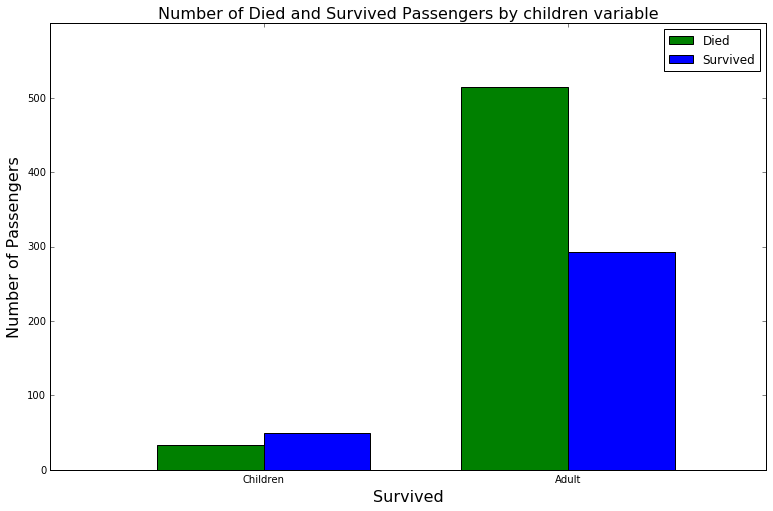

In [75]:
# Creating barplot that represented number of survivors and dead by children and adult 
# Define plot size in inches (width, height)
fig = plt.figure(figsize=(14, 8))

# define the x location  
index = np.arange(0,2,1)

#plot data
died_bar = plt.bar(index, [total_died_children,total_died_adult], width = 0.35,color='g')
survived_bar = plt.bar(index + 0.35, [total_survived_children, total_survived_adult], width = 0.35,color='b')

#configure legend
plt.legend( (died_bar,survived_bar), ('Died','Survived') )

#configure X axes
plt.xlim(-0.35,2)
plt.xticks(index + 0.35, ('Children','Adult'))

#configure  Y axes
plt.ylim(0,600)
plt.yticks(np.arange(0,600,100))

#labels
plt.xlabel("Survived", size=16)
plt.ylabel("Number of Passengers", size=16)

#title
plt.title("Number of Died and Survived Passengers by children variable" , size=16)

#adjust plot
plt.subplots_adjust(left=0.19)
#show plot
plt.show()

In [76]:
total_survived_boys = DataFrame_children_Sex_Survived.Number_of_Passenger[7] 
total_survived_girls = DataFrame_children_Sex_Survived.Number_of_Passenger[6] 
total_survived_men = DataFrame_children_Sex_Survived.Number_of_Passenger[3] 
total_survived_women = DataFrame_children_Sex_Survived.Number_of_Passenger[2] 
total_died_boys = DataFrame_children_Sex_Survived.Number_of_Passenger[5] 
total_died_girls = DataFrame_children_Sex_Survived.Number_of_Passenger[4] 
total_died_men = DataFrame_children_Sex_Survived.Number_of_Passenger[1] 
total_died_women = DataFrame_children_Sex_Survived.Number_of_Passenger[0]  

    
print 'Number of boys survived:', total_survived_boys
print 'Number of boys died:', total_died_boys
print 'Number of girls survived:', total_survived_girls 
print 'Number of girls died:', total_died_girls
print 'Number of men survived:', total_survived_men
print 'Number of men died:', total_died_men
print 'Number of woman survived:', total_survived_women
print 'Number of woman died:', total_died_women

Number of boys survived: 21
Number of boys died: 19
Number of girls survived: 28
Number of girls died: 15
Number of men survived: 88
Number of men died: 449
Number of woman survived: 205
Number of woman died: 66


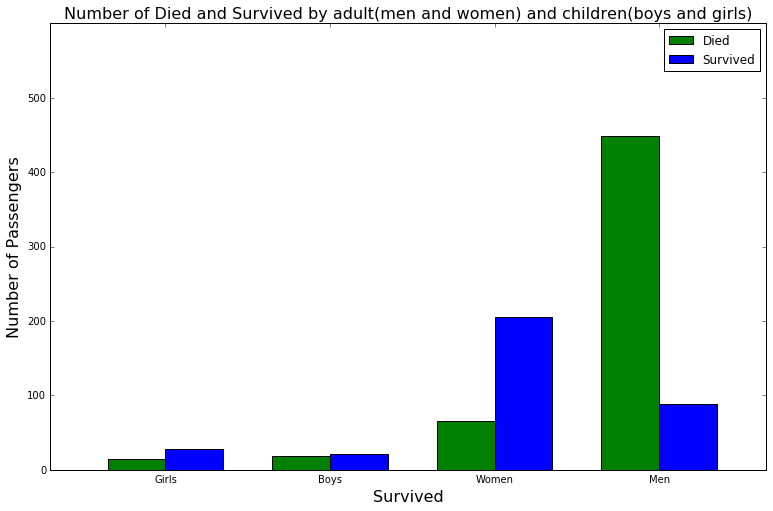

In [77]:
# Creating barplot that represented number of survivors and dead by adult(men and woman) and children(boys and girls)
# Define plot size in inches (width, height)
fig = plt.figure(figsize=(14, 8))

# Defining the x locations for the groups
index = np.arange(0,4,1)

#define width bar 
bar_width = 0.35

#plot data
died_bar = plt.bar(index, [total_died_girls,total_died_boys,total_died_women,total_died_men], width = 0.35,color='g')
survived_bar = plt.bar(index + bar_width, [total_survived_girls,total_survived_boys, total_survived_women,total_survived_men], width=0.35,color='b')

#configure legend
plt.legend( (died_bar,survived_bar), ('Died','Survived') )

#configure X axes
plt.xlim(-0.35,4)
plt.xticks(index + 0.35, ('Girls','Boys','Women','Men'))

#configure  Y axes
plt.ylim(0,600)
plt.yticks(np.arange(0,600,100))

#labels
plt.xlabel("Survived", size=16)
plt.ylabel("Number of Passengers", size=16)

#title
plt.title("Number of Died and Survived by adult(men and women) and children(boys and girls)" , size=16)

#adjust plot
plt.subplots_adjust(left=0.19)
#show plot
plt.show()

The results that we obtained given us the definitive confirm of the fact that it is adopted the code "Women and child first", in fact the adult passengers have more likely to die than a child passengers.

## Conclusion

In [78]:
# Creating DatfaFrame that report number of survived and died by men, women, boys and girls
data = {'survived':[total_survived_men,total_survived_women,total_survived_boys,total_survived_girls],\
        'died':[total_died_men,total_died_women,total_died_boys,total_died_girls]}  
men_women_boys_girls_survival = pd.DataFrame(data,columns=['survived','died'],index=['men','women','boys','girls'])
men_women_boys_girls_survival

,survived,died
men,88,449
women,205,66
boys,21,19
girls,28,15


Sinking the Titanic : ‘women and children first’ ? Based on the previous investigation and analysis, the answer is yes, the code of conduct "women and children first" was adopted. This results that obtained are  than simply making correlational observations.  Further analysis, statistical testing, it is necessary to validating results. The Chi-Square Test for Independence is used. 

In [40]:
# Loading library to perform statistical test
import scipy.stats as sps

# Performing Chi-Square Test 
sps.chi2_contingency(men_women_boys_girls_survival)

(285.31771527232513,
 1.4968007259779755e-61,
 3L,
 array([[ 206.12121212,  330.87878788],
        [ 104.02020202,  166.97979798],
        [  15.35353535,   24.64646465],
        [  16.50505051,   26.49494949]]))

The p-value is  1.4968007259779755e-61. Given that the p-value is so small, we reject the null hypothesis of Chi-Square Test that the survival and be man,woman,boy or girl are independent. Then, using the Titanic dataset given there is association between be man,woman,boy or girl and survival.

## References

* https://www.kaggle.com/c/titanic/data 
* https://it.wikipedia.org/wiki/Women_and_Children_First 
* Wes McKinney - Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython
* http://pandas.pydata.org/pandas-docs/version/0.18.1/tutorials.html
* https://www.encyclopedia-titanica.org/
* http://matplotlib.org/examples/
* http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
* http://mple.m-artwork.eu/tutorial